In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Я выбрал Гамма распределение с параметрами 2 и 2.

In [66]:
gamma_rv = sts.gamma(2.0, 1.0)
print gamma_rv.mean(), gamma_rv.var()

3.0 2.0


   Далее мы сгенерируем 3 выборки, в каждой из которых будет соответственно 1000 средних значений гамма распределения из 5, 10 или 50 элементов соответственно. Мат.ожидание всех выборок будет равна мат ожиданию гамма распределения (сумма параметров), а дисперсия, согласно ЦПТ, будет равна базовой дисперсии (первый параметр), поделенной на колличество элементов в выборке.

Так как Я посчитал целесообразным выводить на экран не гистограму, а эмпирическую функцию плотности, что, на мой взгляд, наглядее показывает сходимость графика с ростом n.

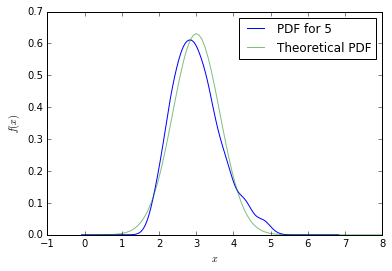

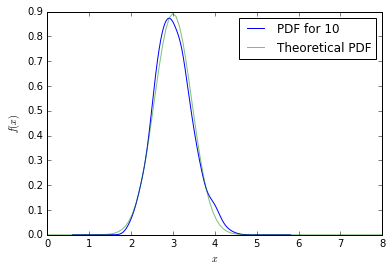

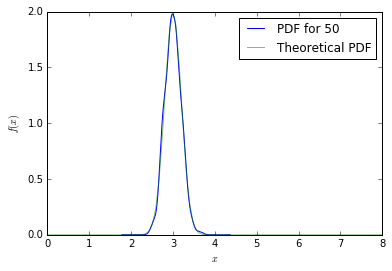

In [69]:
from math import sqrt 
for i in [5, 10, 50]:
    norm_rv = sts.norm(gamma_rv.mean(), sqrt(gamma_rv.var() / i))
    means = []
    for j in range(1000):
        rvs = gamma_rv.rvs(size = i)
        means.append(rvs.mean())
    df = pd.DataFrame(means, columns=['PDF for ' + str(i)])
    x = np.linspace(0, 8, 100)
    ax = df.plot(kind = 'density')
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='Theoretical PDF', alpha=0.5)
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    

Таким образом, с ростом числа элементов, теоретическая функция плотности перестаёт быть видна на графике, что свидетельствует о справедливости ЦПТ. Как мы видим, на первом графике видна почти вся зелёная линия, а на последнем её почти не видно. Делаем вывод, что при росте n, точность аппроксимации существенно увеличивается.